In [1]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv(r'../data_source/combine_data.csv', sep=',')
df.head()
# C:\Users\sudwa\Desktop\ml-disease-symptom\data_source

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,...,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,Description,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4560 entries, 0 to 4559
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Disease       4560 non-null   object
 1   Symptom_1     4560 non-null   object
 2   Symptom_2     4560 non-null   object
 3   Symptom_3     4560 non-null   object
 4   Symptom_4     4212 non-null   object
 5   Symptom_5     3432 non-null   object
 6   Symptom_6     2814 non-null   object
 7   Symptom_7     2148 non-null   object
 8   Symptom_8     1824 non-null   object
 9   Symptom_9     1572 non-null   object
 10  Symptom_10    1440 non-null   object
 11  Symptom_11    1194 non-null   object
 12  Symptom_12    744 non-null    object
 13  Symptom_13    504 non-null    object
 14  Symptom_14    306 non-null    object
 15  Symptom_15    240 non-null    object
 16  Symptom_16    192 non-null    object
 17  Symptom_17    72 non-null     object
 18  Description   4560 non-null   object
 19  Precau

In [10]:
df= df.fillna(' ')
df.isnull().sum()

Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4       0
Symptom_5       0
Symptom_6       0
Symptom_7       0
Symptom_8       0
Symptom_9       0
Symptom_10      0
Symptom_11      0
Symptom_12      0
Symptom_13      0
Symptom_14      0
Symptom_15      0
Symptom_16      0
Symptom_17      0
Description     0
Precaution_1    0
Precaution_2    0
Precaution_3    0
Precaution_4    0
dtype: int64

In [11]:
# new precaution: combine all `,`
df['Precaution']=df[['Precaution_1','Precaution_2', 'Precaution_3', 'Precaution_4']].apply(lambda x:', '.join(x),axis=1)

In [12]:
df.columns

Index(['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9',
       'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14',
       'Symptom_15', 'Symptom_16', 'Symptom_17', 'Description', 'Precaution_1',
       'Precaution_2', 'Precaution_3', 'Precaution_4', 'Precaution'],
      dtype='object')

In [13]:
# new symptom
df['Symptom']=df[['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9',
       'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14',
       'Symptom_15', 'Symptom_16', 'Symptom_17']].apply(lambda x:' '.join(x[x.notnull()]),axis=1)

df['Symptom']=df['Symptom'].str.replace('_', ' ')
# df['Symptom']=df['Symptom'].str.replace(''', ' ')

In [14]:
df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,...,Symptom_15,Symptom_16,Symptom_17,Description,Precaution_1,Precaution_2,Precaution_3,Precaution_4,Precaution,Symptom
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,,,,,,...,,,,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths,"bath twice, use detol or neem in bathing water...",itching skin rash nodal skin eruptions disc...
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,,,,,,,...,,,,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths,"bath twice, use detol or neem in bathing water...",skin rash nodal skin eruptions dischromic ...
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,,,,,,,...,,,,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths,"bath twice, use detol or neem in bathing water...",itching nodal skin eruptions dischromic pat...
3,Fungal infection,itching,skin_rash,dischromic _patches,,,,,,,...,,,,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths,"bath twice, use detol or neem in bathing water...",itching skin rash dischromic patches ...
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,,,,,,,...,,,,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths,"bath twice, use detol or neem in bathing water...",itching skin rash nodal skin eruptions ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4555,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,,,,...,,,,Benign paroxysmal positional vertigo (BPPV) is...,lie down,avoid sudden change in body,avoid abrupt head movment,relax,"lie down, avoid sudden change in body, avoid a...",vomiting headache nausea spinning movement...
4556,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,,,,,,...,,,,"Acne vulgaris is the formation of comedones, p...",bath twice,avoid fatty spicy food,drink plenty of water,avoid too many products,"bath twice, avoid fatty spicy food, drink plen...",skin rash pus filled pimples blackheads sc...
4557,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,,,,,,...,,,,Urinary tract infection: An infection of the k...,drink plenty of water,increase vitamin c intake,drink cranberry juice,take probiotics,"drink plenty of water, increase vitamin c inta...",burning micturition bladder discomfort foul...
4558,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,,,,...,,,,Psoriasis is a common skin disorder that forms...,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths,"wash hands with warm soapy water, stop bleedin...",skin rash joint pain skin peeling silver l...


In [15]:
df.Symptom[1]

' skin rash  nodal skin eruptions  dischromic  patches                            '

In [16]:
data_combine=df[['Disease','Symptom','Precaution','Description']]
data_combine.head()

,Disease,Symptom,Precaution,Description
0,Fungal infection,itching skin rash nodal skin eruptions disc...,"bath twice, use detol or neem in bathing water...","In humans, fungal infections occur when an inv..."
1,Fungal infection,skin rash nodal skin eruptions dischromic ...,"bath twice, use detol or neem in bathing water...","In humans, fungal infections occur when an inv..."
2,Fungal infection,itching nodal skin eruptions dischromic pat...,"bath twice, use detol or neem in bathing water...","In humans, fungal infections occur when an inv..."
3,Fungal infection,itching skin rash dischromic patches ...,"bath twice, use detol or neem in bathing water...","In humans, fungal infections occur when an inv..."
4,Fungal infection,itching skin rash nodal skin eruptions ...,"bath twice, use detol or neem in bathing water...","In humans, fungal infections occur when an inv..."


In [17]:
data=data_combine[['Disease', 'Symptom']]
data

,Disease,Symptom
0,Fungal infection,itching skin rash nodal skin eruptions disc...
1,Fungal infection,skin rash nodal skin eruptions dischromic ...
2,Fungal infection,itching nodal skin eruptions dischromic pat...
3,Fungal infection,itching skin rash dischromic patches ...
4,Fungal infection,itching skin rash nodal skin eruptions ...
...,...,...
4555,(vertigo) Paroymsal Positional Vertigo,vomiting headache nausea spinning movement...
4556,Acne,skin rash pus filled pimples blackheads sc...
4557,Urinary tract infection,burning micturition bladder discomfort foul...
4558,Psoriasis,skin rash joint pain skin peeling silver l...


In [18]:
# data['Disease'].value_counts()
X=data['Symptom']
y=data['Disease']

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3648,), (912,), (3648,), (912,))

In [20]:
X_train

2413     fatigue  yellowish skin  nausea  loss of appe...
1721     vomiting  fatigue  yellowish skin  dark urine...
3291     chills  vomiting  fatigue  weight loss  cough...
1412     cramps  bruising  obesity  swollen legs  swol...
4412    itching  skin rash  stomach pain  burning mict...
                              ...                        
4426    itching  fatigue  lethargy  yellowish skin  da...
466      fatigue  cough  high fever  breathlessness  f...
3092    itching  skin rash  fatigue  lethargy  high fe...
3772     back pain  weakness in limbs  neck pain  dizz...
860      back pain  weakness in limbs  neck pain  dizz...
Name: Symptom, Length: 3648, dtype: object

In [21]:
X_test

471      indigestion  headache  blurred and distorted ...
2646     continuous sneezing  chills  fatigue  cough  ...
23       stomach pain  acidity  ulcers on tongue  coug...
3477     fatigue  yellowish skin  nausea  loss of appe...
135      chills  vomiting  sweating  headache  nausea ...
                              ...                        
2115     joint pain  vomiting  high fever  yellowish s...
4348     chills  vomiting  fatigue  high fever  headac...
408      stomach pain  acidity  vomiting  cough  chest...
170      joint pain  vomiting  yellowish skin  dark ur...
540      chills  vomiting  fatigue  high fever  nausea...
Name: Symptom, Length: 912, dtype: object

In [22]:
y_train

2413             Hepatitis C
1721             Hepatitis D
3291            Tuberculosis
1412          Varicose veins
4412           Drug Reaction
                ...         
4426             Hepatitis B
466         Bronchial Asthma
3092             Chicken pox
3772    Cervical spondylosis
860     Cervical spondylosis
Name: Disease, Length: 3648, dtype: object

In [23]:
y_test

471        Migraine
2646    Common Cold
23             GERD
3477    Hepatitis C
135         Malaria
           ...     
2115    Hepatitis E
4348        Typhoid
408            GERD
170     hepatitis A
540         Typhoid
Name: Disease, Length: 912, dtype: object

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train)
print(X_train_tfidf.shape)
x_test_tfidf=vectorizer.transform(X_test)
x_test_tfidf.shape

(3648, 194)


(912, 194)

In [35]:
# X_train_tfidf
X_test

471      indigestion  headache  blurred and distorted ...
2646     continuous sneezing  chills  fatigue  cough  ...
23       stomach pain  acidity  ulcers on tongue  coug...
3477     fatigue  yellowish skin  nausea  loss of appe...
135      chills  vomiting  sweating  headache  nausea ...
                              ...                        
2115     joint pain  vomiting  high fever  yellowish s...
4348     chills  vomiting  fatigue  high fever  headac...
408      stomach pain  acidity  vomiting  cough  chest...
170      joint pain  vomiting  yellowish skin  dark ur...
540      chills  vomiting  fatigue  high fever  nausea...
Name: Symptom, Length: 912, dtype: object

In [36]:
from sklearn.svm import SVC
classifier = SVC(kernel ='rbf', random_state = 0)
 # training set in x, y axis
classifier.fit(X_train_tfidf, y_train)

SVC(random_state=0)

In [40]:
# classifier.fit(X_train_tfidf, y_train_tfidf)
predictions = classifier.predict(x_test_tfidf)

In [51]:
print('Accuracy: ', accuracy_score(y_test, predictions)*100)

Accuracy:  100.0


In [41]:
from sklearn import metrics
print(metrics.classification_report(y_test,predictions))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        21
                                   AIDS       1.00      1.00      1.00        28
                                   Acne       1.00      1.00      1.00        32
                    Alcoholic hepatitis       1.00      1.00      1.00        28
                                Allergy       1.00      1.00      1.00        28
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        29
                   Cervical spondylosis       1.00      1.00      1.00        21
                            Chicken pox       1.00      1.00      1.00        11
                    Chronic cholestasis       1.00      1.00      1.00        27
                            Common Cold       1.00      1.00      1.00        13
                           

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 14 stored elements and shape (1, 194)>
  Coords	Values
  (0, 7)	0.2478601022838101
  (0, 20)	0.2789451966197742
  (0, 42)	0.2762799282341576
  (0, 47)	0.2789451966197742
  (0, 48)	0.3267171850631542
  (0, 54)	0.25142390058941255
  (0, 73)	0.1716954240754089
  (0, 78)	0.25142390058941255
  (0, 80)	0.2789451966197742
  (0, 84)	0.22887199992396842
  (0, 111)	0.22906105809335953
  (0, 159)	0.277031058083668
  (0, 183)	0.2789451966197742
  (0, 184)	0.3267171850631542
Migraine
F1-score% = 100.0 | Accuracy% = 100.0


<Axes: >

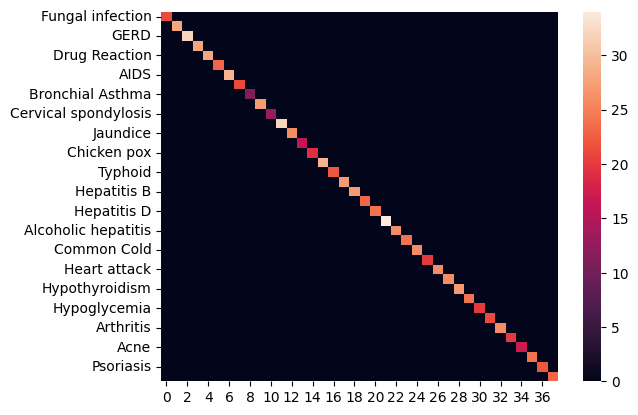

In [49]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score,accuracy_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns


rfc = RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators= 500, max_depth=13)
rfc.fit(X_train_tfidf,y_train)

preds=rfc.predict(x_test_tfidf)

print(x_test_tfidf[0])
print(preds[0])

conf_mat = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
sns.heatmap(df_cm)

In [56]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


clf = {
    'svc':SVC(kernel ='rbf', random_state = 0),
    'linearSVC':LinearSVC(),
    'log_reg':LogisticRegression(),
    'ridge':RidgeClassifier(),
    'sgd':SGDClassifier(),
    'Random Forest': RandomForestClassifier(),
    'GradientBoost': GradientBoostingClassifier(),
    'ExtraTrees': ExtraTreesClassifier(),
    'bagging':BaggingClassifier(), 
    'adabosst':AdaBoostClassifier(),
    'knn':KNeighborsClassifier(),
    # 'naive_bayes':GaussianNB(),
    'tree':DecisionTreeClassifier(),
    
}

for name, model in clf.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(x_test_tfidf)
    print(f'{name} - Accuracy: ', accuracy_score(y_test, y_pred)*100)

SCV Accuracy:  100.0
linearSVC Accuracy:  100.0
log_reg Accuracy:  100.0
ridge Accuracy:  99.89035087719299
sgd Accuracy:  100.0
Random Forest Accuracy:  100.0
GradientBoost Accuracy:  100.0
ExtraTrees Accuracy:  100.0
bagging Accuracy:  100.0
adabosst Accuracy:  10.197368421052632
knn Accuracy:  100.0
tree Accuracy:  100.0


In [60]:
from sklearn.pipeline import Pipeline

for name, model in clf.items():
    text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', model),])

    text_clf.fit(X_train, y_train)  


    predictions = text_clf.predict(X_test)
    print(f'{name} - Accuracy: ', accuracy_score(y_test, y_pred)*100)

SCV - Accuracy:  100.0
linearSVC - Accuracy:  100.0
log_reg - Accuracy:  100.0
ridge - Accuracy:  100.0
sgd - Accuracy:  100.0
Random Forest - Accuracy:  100.0
GradientBoost - Accuracy:  100.0
ExtraTrees - Accuracy:  100.0
bagging - Accuracy:  100.0
adabosst - Accuracy:  100.0
knn - Accuracy:  100.0
tree - Accuracy:  100.0


In [61]:
# Model test

In [62]:
data_combine.head()

,Disease,Symptom,Precaution,Description
0,Fungal infection,itching skin rash nodal skin eruptions disc...,"bath twice, use detol or neem in bathing water...","In humans, fungal infections occur when an inv..."
1,Fungal infection,skin rash nodal skin eruptions dischromic ...,"bath twice, use detol or neem in bathing water...","In humans, fungal infections occur when an inv..."
2,Fungal infection,itching nodal skin eruptions dischromic pat...,"bath twice, use detol or neem in bathing water...","In humans, fungal infections occur when an inv..."
3,Fungal infection,itching skin rash dischromic patches ...,"bath twice, use detol or neem in bathing water...","In humans, fungal infections occur when an inv..."
4,Fungal infection,itching skin rash nodal skin eruptions ...,"bath twice, use detol or neem in bathing water...","In humans, fungal infections occur when an inv..."


In [71]:
inputs=data_combine['Symptom'][300]
print(inputs)
test=data_combine['Disease'][300]
test

 vomiting  fatigue  anxiety  sweating  headache  nausea  blurred and distorted vision  excessive hunger  slurred speech  irritability  palpitations            


'Hypoglycemia'

In [63]:
gbc=GradientBoostingClassifier()
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', gbc),])

pipe.fit(X_train, y_train)  


pred = pipe.predict(X_test)
print(f'{gbc} - Accuracy: ', accuracy_score(y_test, pred)*100)

GradientBoostingClassifier() - Accuracy:  100.0


In [76]:
ypred=pipe.predict([inputs])[0]
ypred

'Hypoglycemia'

In [101]:
precau=data_combine[data_combine['Disease'] == ypred]
precau

,Disease,Symptom,Precaution,Description
300,Hypoglycemia,vomiting fatigue anxiety sweating headach...,"lie down on side, check in pulse, drink sugary...",Hypoglycemia is a condition in which your blo...
301,Hypoglycemia,vomiting fatigue anxiety sweating headach...,"lie down on side, check in pulse, drink sugary...",Hypoglycemia is a condition in which your blo...
302,Hypoglycemia,vomiting fatigue anxiety sweating headach...,"lie down on side, check in pulse, drink sugary...",Hypoglycemia is a condition in which your blo...
303,Hypoglycemia,fatigue anxiety sweating headache nausea ...,"lie down on side, check in pulse, drink sugary...",Hypoglycemia is a condition in which your blo...
304,Hypoglycemia,vomiting anxiety sweating headache nausea...,"lie down on side, check in pulse, drink sugary...",Hypoglycemia is a condition in which your blo...
...,...,...,...,...
4400,Hypoglycemia,vomiting fatigue anxiety sweating headach...,"lie down on side, check in pulse, drink sugary...",Hypoglycemia is a condition in which your blo...
4438,Hypoglycemia,vomiting fatigue anxiety sweating headach...,"lie down on side, check in pulse, drink sugary...",Hypoglycemia is a condition in which your blo...
4476,Hypoglycemia,vomiting fatigue anxiety sweating headach...,"lie down on side, check in pulse, drink sugary...",Hypoglycemia is a condition in which your blo...
4514,Hypoglycemia,vomiting fatigue anxiety sweating headach...,"lie down on side, check in pulse, drink sugary...",Hypoglycemia is a condition in which your blo...


In [99]:
data_combine[data_combine['Disease'] == ypred]['Description'].values

array([" Hypoglycemia is a condition in which your blood sugar (glucose) level is lower than normal. Glucose is your body's main energy source. Hypoglycemia is often related to diabetes treatment. But other drugs and a variety of conditions — many rare — can cause low blood sugar in people who don't have diabetes.",
       " Hypoglycemia is a condition in which your blood sugar (glucose) level is lower than normal. Glucose is your body's main energy source. Hypoglycemia is often related to diabetes treatment. But other drugs and a variety of conditions — many rare — can cause low blood sugar in people who don't have diabetes.",
       " Hypoglycemia is a condition in which your blood sugar (glucose) level is lower than normal. Glucose is your body's main energy source. Hypoglycemia is often related to diabetes treatment. But other drugs and a variety of conditions — many rare — can cause low blood sugar in people who don't have diabetes.",
       " Hypoglycemia is a condition in which 

In [95]:
precau=data_combine[data_combine['Disease'] == ypred]['Description'].values[0]
precau

" Hypoglycemia is a condition in which your blood sugar (glucose) level is lower than normal. Glucose is your body's main energy source. Hypoglycemia is often related to diabetes treatment. But other drugs and a variety of conditions — many rare — can cause low blood sugar in people who don't have diabetes."

In [79]:
data_combine[data_combine['Disease'] == ypred]['Description'].values[0]

print(data_combine[data_combine['Disease'] == ypred]['Precaution'].values[0])

lie down on side, check in pulse, drink sugary drinks, consult doctor
